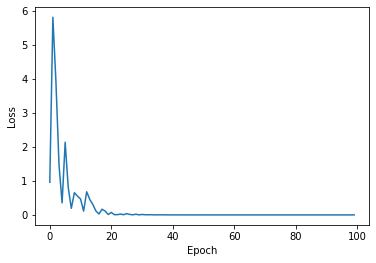

In [43]:
import numpy as np
import matplotlib.pyplot as plt

x_data = [1.0,2.0,3.0]
y_data = [2.0,4.0,6.0]

w = 1.0
alpha = 0.01
loss_list = []

def predict(x):
    return x*w

def all_sample_loss(x_data,y_data):
    loss = 0
    for x, y in zip(x_data, y_data):
        y_pre = predict(x)
        loss += (y_pre - y)**2.0
    return loss / len(x_data)

def one_sample_loss(x, y):
    y_pre = predict(x)
    return (y_pre - y) **2

def gradient(x_data, y_data):
    grad = 0;
    for x, y in zip(x_data, y_data):
        y_pre = predict(x)
        grad += 2*x*(y_pre - y)
    return grad / len(x_data)

def stochastic_gradient(x, y):
    y_pre = predict(x)
    return 2*x*(y_pre - y)

# 随机梯度下降法
for epoch in range(100):
    index = np.random.randint(0,len(x_data))
    x = x_data[index]
    y = y_data[index]
    grad = stochastic_gradient(x, y)
    w -= alpha*grad
    loss_v = one_sample_loss(x, y)
    loss_list.append(loss_v)
#     print(epoch, x,y,w,grad,loss_v)
epoch = range(100)
plt.plot(epoch, loss_list)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

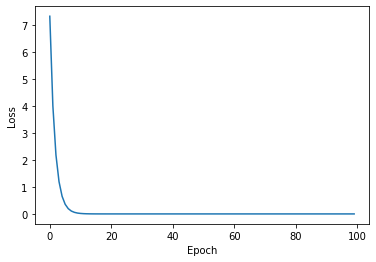

7.999998569488525


In [85]:
import torch
import numpy as np
import matplotlib.pyplot as plt

x_data = [1.0,2.0,3.0]
y_data = [2.0,4.0,6.0]

w = torch.tensor([1.0])
w.requires_grad = True
alpha = 0.01

def forward(x):
    return x*w

def loss(x, y):
    y_pre = forward(x)
    return (y_pre - y)**2

loss_list = []

for epoch in range(100):
    for x, y in zip(x_data, y_data):
        loss_back = loss(x, y)
#         print(loss_back.item())
        loss_back.backward()
        w.data -= alpha*w.grad.data
        w.grad.data.zero_()
#         print('l.item: ',loss_back.item())
    loss_list.append(loss_back.item())
        
epoch = range(100)
plt.plot(epoch, loss_list)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()
print(forward(4).item())

1. 准备数据
2. 设计模型
3. 构造损失函数和优化器
4. 迭代训练
---
0. 前向传播
1. 计算损失函数
2. 计算反向传播,计算梯度
3. 优化更新参数
---
4. \_\_init__(self)默认调用，为类初始化实例
5. \_\_call__(self)使类的对象具有函数功能
6. \_\_del__(self)默认调用，删除引用对象
6. nn.Module 是所有神经网络单元（neural network modules）的基类/父类
7. Tensor 张量
----
1. \_\_call__(self, *input, **kwargs) 
    - *input : 个数不确定参数，以数组形式存储
    - **kwargs ：确定参数变量，以key-value形式存储
2. 矩阵的列表示feature
3. 继承Module的类中，重写init和forward调用顺序 ?????

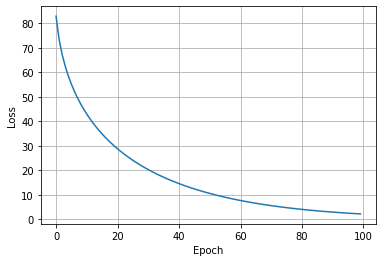

6.076207637786865


In [96]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

x_data = torch.Tensor([[1.0], [2.0], [3.0]])
y_data = torch.Tensor([[2.0], [4.0], [6.0]])
loss_list = []
epoch_size = 100
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()        # 继承父类的构造方法
        self.linear = nn.Linear(1, 1)
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

model = LinearModel()

criterion = nn.MSELoss(size_average=False) # 是否批量求均值
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01)
for epoch in range(epoch_size):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)#损失函数
    loss_list.append(loss.item())
    optimizer.zero_grad() #梯度归0，优化器权重归0？？？？？
    loss.backward() #反向传播
    optimizer.step()#更新权重

epoch = range(epoch_size)
plt.plot(epoch,loss_list)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.show()
# print(model.linear.weight.item())    
# print(model.linear.bias.item())   
x_test = torch.Tensor([[4.0]])
y_test = model(x_test)
print(y_test.item())

1. torch.sigmoid(input) #函数
2. torch.nn.Sigmoid() #类
3. torch.nn.functional.sigmoid() #函数
---
1. optimizer.zero_grad() 

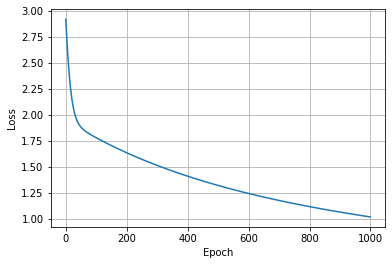

y_pred =  tensor([[0.8791]])


In [101]:
import torch
import torch.nn.functional as F
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

x_data = torch.Tensor([[1.0], [2.0], [3.0]])
y_data = torch.Tensor([[0], [0], [1]])
loss_list = []
epoch_size = 1000
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel,self).__init__()
        self.linear = torch.nn.Linear(1,1)
    def forward(self,x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred
model = LogisticRegressionModel()

# 构建损失函数 和 最优化
criterion = torch.nn.BCELoss(size_average = False) 
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

# 训练
for epoch in range(epoch_size):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    loss_list.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch = range(epoch_size)
plt.plot(epoch,loss_list)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.show()

x_test = torch.Tensor([[4.0]])
y_test = model(x_test)
print('y_pred = ', y_test.data)

Linear(in_features=8, out_features=6, bias=True)
loss ==  0.6462705731391907 acc ==  0.6534914361001317
loss ==  0.6460528373718262 acc ==  0.6534914361001317
loss ==  0.6458584666252136 acc ==  0.6534914361001317
loss ==  0.6456766128540039 acc ==  0.6534914361001317
loss ==  0.6455035209655762 acc ==  0.6534914361001317
loss ==  0.6453359723091125 acc ==  0.6534914361001317
loss ==  0.6451706886291504 acc ==  0.6534914361001317
loss ==  0.6450045704841614 acc ==  0.6534914361001317
loss ==  0.6448346376419067 acc ==  0.6534914361001317
loss ==  0.6446577310562134 acc ==  0.6534914361001317


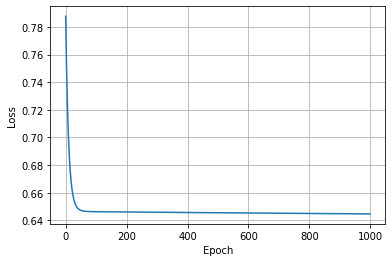

In [106]:
import torch
import torch.nn.functional as F
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

xy = np.loadtxt('./dataset/diabetes.csv', delimiter=',', dtype=np.float32)
x_data = torch.from_numpy(xy[:,:-1])
y_data = torch.from_numpy(xy[:,[-1]])

class ClassificationModule(nn.Module):
    def __init__(self):
        super(ClassificationModule, self).__init__()
        self.linear1 = nn.Linear(8,6)
        print(self.linear1)
        self.linear2 = nn.Linear(6,4)
        self.linear3 = nn.Linear(4,1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x

model = ClassificationModule()

#构建损失函数和最优化
criterion = torch.nn.BCELoss(reduction='mean')  
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

#训练
epoch_size = 1000
epoch_debug = epoch_size/10
epoch_debug_rem = epoch_debug -1
loss_list = []
for epoch in range(epoch_size):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    loss_list.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch%epoch_debug == epoch_debug_rem:
        y_pred_label = torch.where(y_pred > 0.5, torch.tensor([1.0]), torch.tensor([0.0]))
        acc = torch.eq(y_pred_label, y_data).sum().item()/y_data.size(0)
        print('loss == ',loss.item(), 'acc == ',acc)

epoch = range(epoch_size)
plt.plot(epoch,loss_list)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.show()

---
1. 神经网络数据热衷（0，1）范围
2. 图片维度（N，c,w,h),N个数据，c图片通道，w宽，h高
3. DataSet ：抽象类,构造数据集
4. DataLoader ：加载数据集
5. \_\_getitem__() ：为数据样本提供下标
6. shuffle ：打乱数据集
---
1. zip()  遍历
2. enumerate() 数据和索引遍历

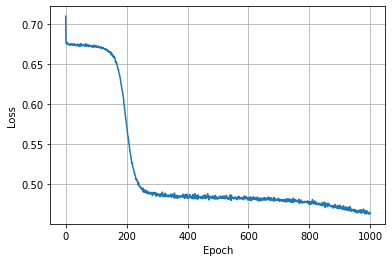

In [85]:
import torch
import torch.nn.functional as F
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

# 构造数据集，提供索引
class DiabetesDataset(Dataset):
    def __init__(self, filepath):
        xy = np.loadtxt(filepath, delimiter=',', dtype=np.float32)
        self.len = xy.shape[0]
        self.x_data = torch.from_numpy(xy[:,:-1])
        self.y_data = torch.from_numpy(xy[:,[-1]])
        
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]
    
    def __len__(self):
        return self.len 
dataset =  DiabetesDataset('./dataset/diabetes.csv')
train_loader = DataLoader(dataset=dataset, batch_size=32, shuffle=True, num_workers=0)

#构造模型
class ClassificationModule(nn.Module):
    def __init__(self):
        super(ClassificationModule, self).__init__()
        self.linear1 = nn.Linear(8,6)
        self.linear2 = nn.Linear(6,4)
        self.linear3 = nn.Linear(4,1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x
model = ClassificationModule()

#构建损失函数和最优化
criterion = torch.nn.BCELoss(reduction='mean')  
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

#训练
epoch_size = 1000
epoch_debug = epoch_size/10
epoch_debug_rem = epoch_debug -1
loss_list = []
if __name__ == '__main__':
    for epoch in range(epoch_size):
        loss_sum = 0.0
        for i, (x, y) in enumerate(train_loader, 0):
            y_pred = model(x)
            loss = criterion(y_pred, y)
            loss_sum += loss.item()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        loss_list.append(loss_sum/i)
    epoch = range(epoch_size)
    plt.plot(epoch,loss_list)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.grid()
    plt.show()

In [107]:
import torch
import torch.nn.functional as F
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

#准备数据集
raw_data = np.loadtxt('./dataset/diabetes.csv',delimiter=',', dtype=np.float32)
raw_x = raw_data[:,:-1]
raw_y = raw_data[:,[-1]]
xtrain, xtest, ytrain, ytest = train_test_split(raw_x, raw_y, test_size=0.3)
xtest_data = torch.from_numpy(xtest)
ytest_data = torch.from_numpy(ytest)

#构造数据集
class DiabetesDataset(Dataset):
    def __init__(self, data, label):
        self.x_data = torch.from_numpy(data)
        self.y_data = torch.from_numpy(label)
        self.len = data.shape[0]
        
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]
    
    def __len__(self):
        return self.len
train_dataset = DiabetesDataset(xtrain, ytrain)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True, num_workers=0)

#构造模型
class ClassificationModule(nn.Module):
    def __init__(self):
        super(ClassificationModule, self).__init__()
        self.linear1 = nn.Linear(8,6)
        self.linear2 = nn.Linear(6,4)
        self.linear3 = nn.Linear(4,1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x
model = ClassificationModule()

#构建损失函数和最优化
criterion = torch.nn.BCELoss(reduction='mean')  
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

#学习数据集
epoch_size = 1000
epoch_debug = epoch_size/10
epoch_debug_rem = epoch_debug -1
#训练集
def train(epoch):
    train_loss = 0.0
    for i, (x, y) in enumerate(train_loader, 0):
        y_pred = model(x)
        loss = criterion(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        
    if epoch%epoch_debug == epoch_debug_rem:
        print('train_loss=',train_loss/i,'--',end=' ')
#测试集
def test():
    with torch.no_grad():
        y_pred = model(xtest_data)
        y_pred_label = torch.where(y_pred > 0.5, torch.tensor([1.0]), torch.tensor([0.0]))
        acc = torch.eq(y_pred_label, ytest_data).sum().item()/ytest_data.size(0)
        print('test_acc=', acc)

if __name__ == '__main__':
    for epoch in range(epoch_size):
        train(epoch)
        if epoch%epoch_debug == epoch_debug_rem:
            test()

train_loss= 0.6822552010416985 -- test_acc= 0.6578947368421053
train_loss= 0.5784307736903429 -- test_acc= 0.6754385964912281
train_loss= 0.47986097633838654 -- test_acc= 0.75
train_loss= 0.4690882693976164 -- test_acc= 0.7412280701754386
train_loss= 0.4714590050280094 -- test_acc= 0.7456140350877193
train_loss= 0.4630775414407253 -- test_acc= 0.7412280701754386
train_loss= 0.46046087983995676 -- test_acc= 0.7631578947368421
train_loss= 0.4526687506586313 -- test_acc= 0.7675438596491229
train_loss= 0.44920163694769144 -- test_acc= 0.7675438596491229
train_loss= 0.4526497609913349 -- test_acc= 0.7763157894736842


In [96]:
import torch
import torch.nn.functional as F
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt

a = np.random.rand(10,3)
b = torch.from_numpy(a)
print(b.size(0))

10
